Simple Linear Regression
-----

**Question 1**  

The scatterplots below show the relationship between height, diameter, and volume of timber in 31 felled black cherry trees. The diameter of the tree is measured 4.5 feet above the ground.  

<img src="images/lab6_1_q4.png" width="600">  

(a) Describe the relationship between volume and height of these trees.  

(b) Describe the relationship between volume and diameter of these trees.  

(c) Suppose you have height and diameter measurements for another black cherry tree. Which of these variables would be preferable to use to predict the volume of timber in this tree using a simple linear regression model? Explain your reasoning.

**Question 2**  

In `utils.csv` are the average utility bills for homes of a particular size and the average monthly temperature.  

Load the data:

In [6]:

import pandas as pd
import matplotlib as plt
df = pd.read_csv("data/utils.csv")
df.head()

,Month,Average Bill,Average Monthly Temperature
0,Jan,148.5,38
1,Feb,136.5,45
2,Mar,117.0,49
3,Apr,91.5,57
4,May,82.5,69


Make a scatter plot of the data bill by tempeture. Which variable would make the most sense as the response variable?

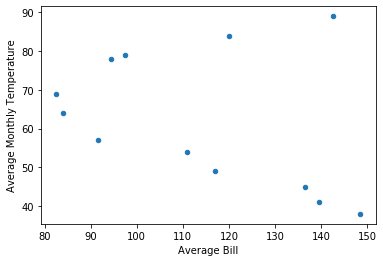

In [9]:
df.plot.scatter(x="Average Bill", y="Average Monthly Temperature")

From visual inspection, what is the relationship between the variables?

Fit a simple linear regression using OLS.  

In [15]:
import statsmodels.api as sms

X = df[['Average Monthly Temperature']]
X = sms.add_constant(X)
X.head() 

,const,Average Monthly Temperature
0,1.0,38
1,1.0,45
2,1.0,49
3,1.0,57
4,1.0,69


In [16]:
y = df["Average Bill"]
y.head()

0    148.5
1    136.5
2    117.0
3     91.5
4     82.5
Name: Average Bill, dtype: float64

In [34]:
model = sms.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Average Bill   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1.416
Date:                Mon, 02 Mar 2020   Prob (F-statistic):              0.261
Time:                        13:57:43   Log-Likelihood:                -53.778
No. Observations:                  12   AIC:                             111.6
Df Residuals:                      10   BIC:                             112.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         143.6228     25.995      5.525      0.000      85.701     201.544
Average Monthly Temperature    -0.4799      0.403     -1.190      0.261      -1.378       0.419
==============================================================================
Omnibus:                        0.570   Durbin-Watson:                   1.176
Prob(Omnibus):                  0.752   Jarque-Bera (JB):                0.588
Skew:                           0.272   Prob(JB):                        0.745
Kurtosis:                       2.062   Cond. No.                         248.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Calculate and interpret the value of $R^2$.
https://stackoverflow.com/questions/44302099/python-statsmodels-ols-confidence-interval

In [35]:
results.rsquared

0.12406543648691726

Interpret the intercept and slope coefficients in terms a home owner would understand.

In [36]:
results.params

const                          143.622805
Average Monthly Temperature     -0.479884
dtype: float64

What is the 95% confidence interval for the intercept?  

In [32]:
results.conf_int()

,0,1
const,85.701257,201.544353
Average Monthly Temperature,-1.378325,0.418556


Is the average monthly temperature a significant predictor of the average utility bill? Why or why not?  

In [ ]:
no because wrong fit

Use the least squares line to estimate the average utility bill if the average monthly temperature is 120 degrees. Do you think that your answer is reasonable? Why or why not? 

<br>

<details><summary>
Click here for a hint…
</summary>
model.predict(…)  
http://statsmodels.sourceforge.net/0.6.0/examples/notebooks/generated/predict.html
</details>

In [38]:
120*results.params[1] + results.params[0]

86.03667481662579

array([125.38719715, 122.02800622, 120.10846855, 116.2693932 ,
       110.51078017, 106.1918204 , 103.31251389, 100.9130918 ,
       105.71193599, 112.91020227, 117.70904645, 123.9475439 ])

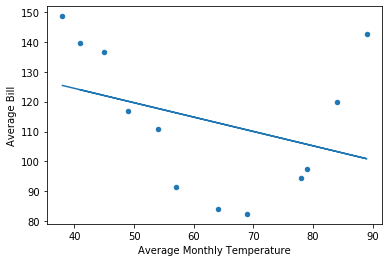

In [45]:
df.plot.scatter(y="Average Bill", x="Average Monthly Temperature")
plt.pyplot.plot(df['Average Monthly Temperature'], results.predict())


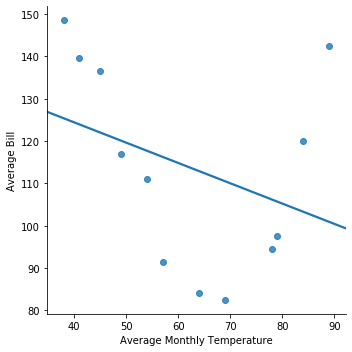

In [48]:
import seaborn as sns

sns.lmplot(y="Average Bill", x="Average Monthly Temperature", data = df, ci = None);

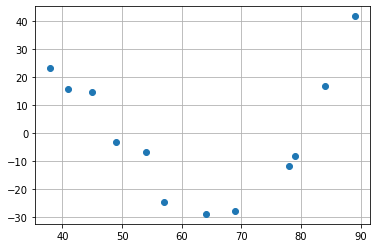

In [54]:
plt.pyplot.plot(df['Average Monthly Temperature'], results.resid, "o")
plt.pyplot.grid()